In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\fattani computers\Downloads\archive (1)\StudentsPerformance.csv")

# Preview the data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Rename columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Add total and average score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3


In [5]:
def categorize(score):
    if score >= 90:
        return "High"
    elif score >= 70:
        return "Medium"
    else:
        return "Low"

df['performance_category'] = df['average_score'].apply(categorize)


In [6]:
df.to_csv("student_performance_cleaned.csv", index=False)


In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [8]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"] / 3


parental_level_of_education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math_score, dtype: float64


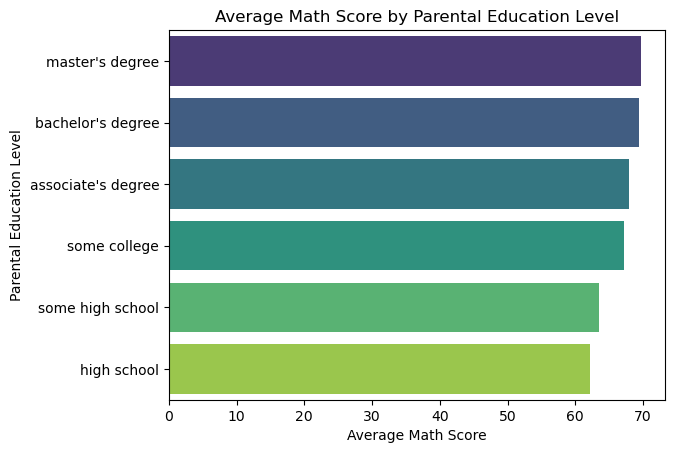

In [9]:
# Group by parental education and get average math score
math_by_education = df.groupby('parental_level_of_education')['math_score'].mean().sort_values(ascending=False)
print(math_by_education)

# Optional: Bar Plot
sns.barplot(x=math_by_education.values, y=math_by_education.index, palette="viridis")
plt.title("Average Math Score by Parental Education Level")
plt.xlabel("Average Math Score")
plt.ylabel("Parental Education Level")
plt.show()


        math_score  reading_score  writing_score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


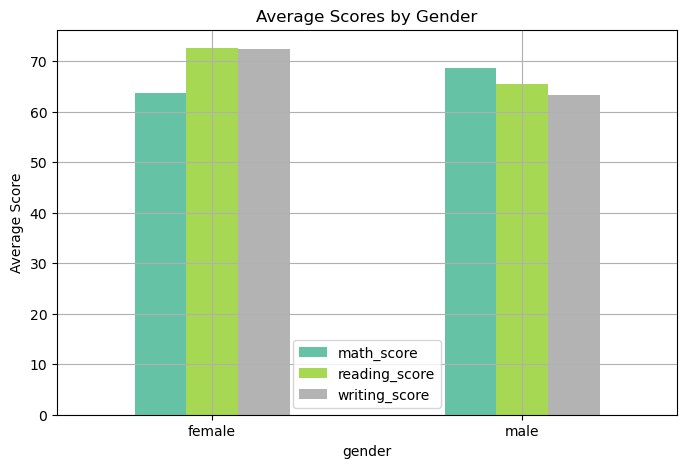

In [10]:
# Average scores by gender
gender_comparison = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()
print(gender_comparison)

# Barplot
gender_comparison.plot(kind='bar', figsize=(8, 5), title="Average Scores by Gender", colormap='Set2')
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


                         math_score  reading_score  writing_score
test_preparation_course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


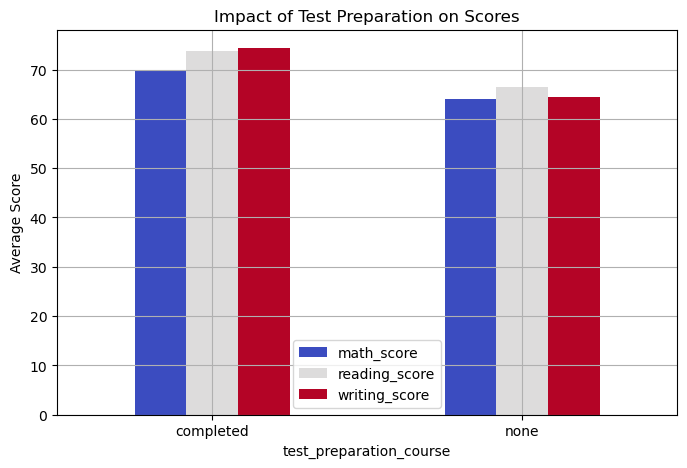

In [11]:
# Group by test preparation
prep_comparison = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean()
print(prep_comparison)

# Barplot
prep_comparison.plot(kind='bar', figsize=(8, 5), title="Impact of Test Preparation on Scores", colormap='coolwarm')
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [12]:
# Top 10% filter
threshold_90 = df['average_score'].quantile(0.90)
top_10_df = df[df['average_score'] >= threshold_90]

# Group by combo
combo = top_10_df.groupby(['gender', 'lunch', 'test_preparation_course']).size().reset_index(name='count')
combo = combo.sort_values('count', ascending=False)
print(combo)


   gender         lunch test_preparation_course  count
3  female      standard                    none     31
2  female      standard               completed     29
6    male      standard               completed     20
7    male      standard                    none      9
0  female  free/reduced               completed      6
4    male  free/reduced               completed      3
1  female  free/reduced                    none      2
5    male  free/reduced                    none      2


lunch           free/reduced   standard
race/ethnicity                         
group A            57.657407  66.616352
group B            60.975845  68.030303
group C            60.412281  70.868293
group D            64.666667  71.746507
group E            67.495935  74.929293


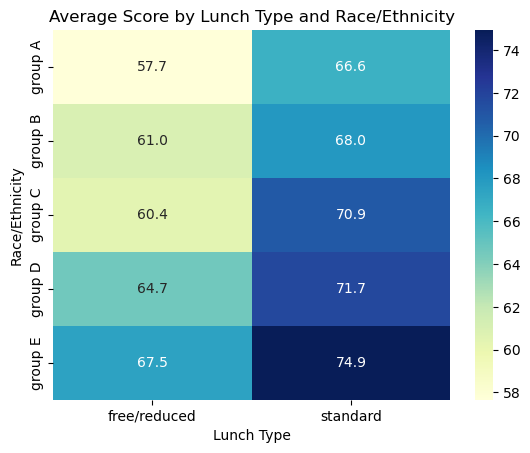

In [13]:
# Group by race and lunch
lunch_race = df.groupby(['race/ethnicity', 'lunch'])['average_score'].mean().unstack()
print(lunch_race)

# Heatmap
sns.heatmap(lunch_race, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Score by Lunch Type and Race/Ethnicity")
plt.ylabel("Race/Ethnicity")
plt.xlabel("Lunch Type")
plt.show()


               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


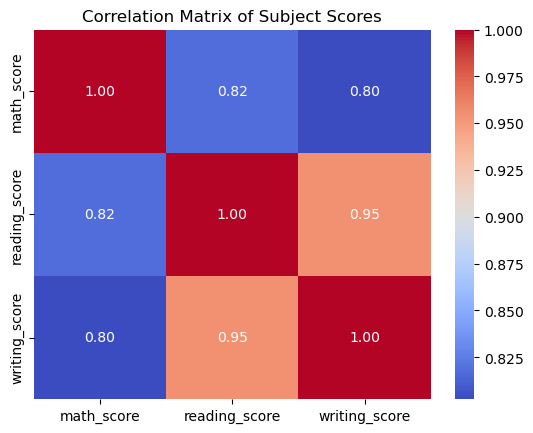


Math vs Writing Correlation: 0.8026420459498075
Reading vs Writing Correlation: 0.9545980771462476


In [14]:
# Correlation matrix
corr_matrix = df[['math_score', 'reading_score', 'writing_score']].corr()
print(corr_matrix)

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Subject Scores")
plt.show()

# Print individual correlations
print("\nMath vs Writing Correlation:", corr_matrix.loc["math_score", "writing_score"])
print("Reading vs Writing Correlation:", corr_matrix.loc["reading_score", "writing_score"])


In [15]:
# Filter top 5% by average score
threshold_95 = df['average_score'].quantile(0.95)
top_5_df = df[df['average_score'] >= threshold_95]

# Demographic profile summary
demo_summary = top_5_df.groupby(['gender', 'race/ethnicity', 'parental_level_of_education']).size().reset_index(name='count')
print(demo_summary)


    gender race/ethnicity parental_level_of_education  count
0   female        group A            some high school      1
1   female        group B          associate's degree      2
2   female        group B           bachelor's degree      1
3   female        group B             master's degree      1
4   female        group B                some college      1
5   female        group C          associate's degree      2
6   female        group C           bachelor's degree      3
7   female        group C                some college      2
8   female        group D          associate's degree      1
9   female        group D           bachelor's degree      2
10  female        group D                 high school      1
11  female        group D             master's degree      3
12  female        group D                some college      2
13  female        group D            some high school      2
14  female        group E          associate's degree      5
15  female        group 

Low       541
Medium    407
High       52
Name: performance_category, dtype: int64


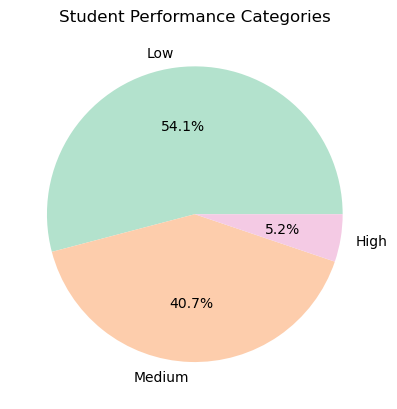

In [16]:
def categorize(score):
    if score >= 90:
        return "High"
    elif score >= 70:
        return "Medium"
    else:
        return "Low"

df['performance_category'] = df['average_score'].apply(categorize)

# Distribution count
print(df['performance_category'].value_counts())

# Optional: Pie Chart
df['performance_category'].value_counts().plot.pie(autopct="%1.1f%%", colors=["#b3e2cd", "#fdcdac", "#f4cae4"])
plt.title("Student Performance Categories")
plt.ylabel("")
plt.show()


In [17]:
df.to_csv("student_performance_cleaned.csv", index=False)
